# Applying Selection Cuts to a DataFrame
***


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
data = pd.read_csv("data/sample_data.csv")      # Read the sensor data in
data.head(3)                                          # Display top 3 rows

time       x       y       z  gforce
0  0.012 -0.0636  0.0315  1.0423   1.045
1  0.013 -0.0632  0.0266  1.0374   1.040
2  0.014 -0.0612  0.0334  1.0257   1.028

## Looking at data

To see if this makes sense, let's make a quick plot of our data!

Text(0,0.5,'Acceleration (g)')

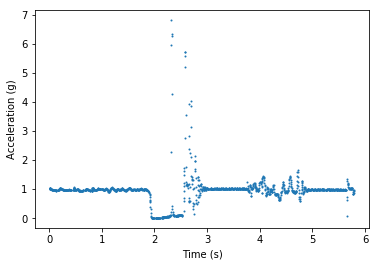

In [5]:
plt.errorbar(data["time"], data["gforce"], fmt=".", markersize=2)
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (g)")

## Looking at a Specific Region of Data

Often we are interested in analyzing only a certain region in our data, for example, a region where the interesting physics is happening.  We do this with cuts.   

As with most things in Python, there are a couple of ways of doing this. 

It looks like the interesting physics starts just before 2 sec and ends around 3 sec. We can make a new data frame, that contains only relevant data, by imposing these time conditions:

1. t > about 1.8 s
2. t < 3 s

## Apply Successive Cuts

Text(0,0.5,'Acceleration (g)')

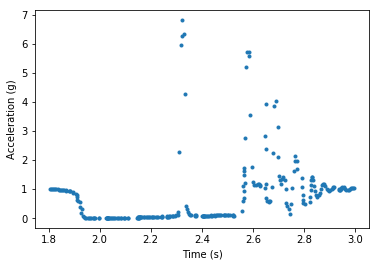

In [20]:
data_gt_2 = data[data["time"] > 1.8]      # create a DataFrame with times greater than 1.8
interesting_data = data_gt_2[data_gt_2["time"] < 3]   # create another DataFrame with times less than 3
plt.errorbar(interesting_data["time"],interesting_data["gforce"], fmt='.') #plot using the new DataFrame
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (g)")

## Applying Multiple Cuts at Once

Text(0,0.5,'Acceleration (g)')

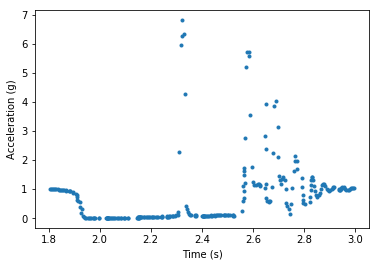

In [21]:
interesting_data2 = data[ (data["time"] > 1.8) & (data["time"] < 3)]
plt.errorbar(interesting_data2["time"],interesting_data2["gforce"], fmt='.') #plot using the new DataFrame
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (g)")

## Applying Cuts to Make a List

It is also possible to make lists directly from a DataFrame with selection cuts. 

Suppose we want a `lists` of all of the interesting `times` and `gforce` readings for the given time region. 

Text(0,0.5,'Acceleration (g)')

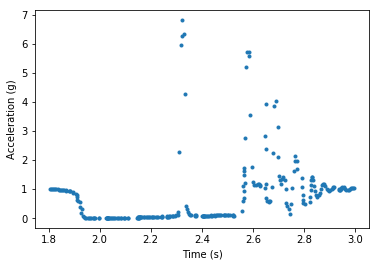

In [23]:
interesting_time_list   = data[((data["time"]>1.8) & (data["time"]<3))]["time"]  # make a time list
interesting_gforce_list = data[((data["time"]>1.8) & (data["time"]<3))]["gforce"]  # make a gforce list
plt.errorbar(interesting_time_list,interesting_gforce_list,fmt='.')
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (g)")

Note that the cuts come first and the final argument is the column in which you are interested. 

list = DataFrame[(cuts)]["column I want"]